In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
plt.rcParams["figure.figsize"] = cm2inch(16,8)
plt.rcParams.update({'font.size':10})
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [3]:
systems=["IA","PA","FA_G-prot","FA_no_G-prot"]
lipid_dir = {"FA_G-prot":"POPC, POPS, POPA, POPG, POPE, CHOL, DPG3, DPSM, PAP6",
            "FA_no_G-prot":"POPC, POPS, POPA, POPG, POPE, CHOL, DPG3, DPSM, PAP6",
            "IA":"POPC, POPS, POPA, POPG, POPE, CHOL, DPG3, DPSM, PAP6",
            "PA":"POPC, POPS, POPA, POPG, POPE, CHOL, DPG3, DPSM, PAP6"}

In [4]:
Data_rmsd = []
Data_rmsf = []
for idx, s in enumerate(systems):
    lipids = lipid_dir[s]
    rmsd = [ np.loadtxt('RMSD/{0:s}_{1:d}_nowat_GCGR_rmsd.xvg'.format(s,r), comments=('#','@')) for r in range(3) ] 
    rmsf = [ np.loadtxt('RMSF/{0:s}_{1:d}_nowat_GCGR_rmsf.xvg'.format(s,r), comments=('#','@')) for r in range(3) ] 
    Data_rmsd.append(rmsd)
    Data_rmsf.append(rmsf)

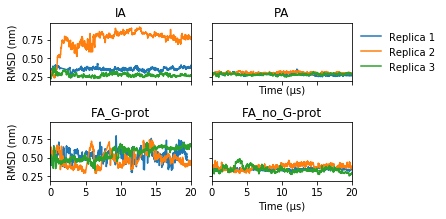

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)

N=100
factor= 1000000

[ ax[0,0].plot(running_mean(Data_rmsd[0][r][:,0]/factor, N=N), running_mean(Data_rmsd[0][r][:,1], N=N), label='Replica {0:d}'.format(r+1)) for r in range(3) ] 
[ ax[0,1].plot(running_mean(Data_rmsd[1][r][:,0]/factor, N=N), running_mean(Data_rmsd[1][r][:,1], N=N), label='Replica {0:d}'.format(r+1)) for r in range(3) ] 
[ ax[1,0].plot(running_mean(Data_rmsd[2][r][:,0]/factor, N=N), running_mean(Data_rmsd[2][r][:,1], N=N), label='Replica {0:d}'.format(r+1)) for r in range(3) ] 
[ ax[1,1].plot(running_mean(Data_rmsd[3][r][:,0]/factor, N=N), running_mean(Data_rmsd[3][r][:,1], N=N), label='Replica {0:d}'.format(r+1)) for r in range(3) ] 

ax[0,0].set_title(systems[0])
ax[0,1].set_title(systems[1])
ax[1,0].set_title(systems[2])
ax[1,1].set_title(systems[3])


for i in range(2):
    ax[i,1].set_xlim(0,20)
    ax[i,1].set_xlabel('Time (µs)')
    ax[i,0].set_ylabel('RMSD (nm)')
ax[0,1].legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

plt.tight_layout()

plt.savefig('RMSD.png', dpi=300, bbox_inches='tight')

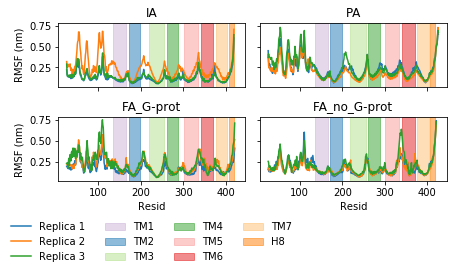

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)


def resids(d):
    return np.arange(26, d.shape[0]+26)
    

[ ax[0,0].plot(resids(Data_rmsf[0][r][:,0]), Data_rmsf[0][r][:,1], label='Replica {0:d}'.format(r+1)) for r in range(3) ] 
[ ax[0,1].plot(resids(Data_rmsf[1][r][:,0]), Data_rmsf[1][r][:,1], label='Replica {0:d}'.format(r+1)) for r in range(3) ] 
[ ax[1,0].plot(resids(Data_rmsf[2][r][:,0]), Data_rmsf[2][r][:,1], label='Replica {0:d}'.format(r+1)) for r in range(3) ] 
[ ax[1,1].plot(resids(Data_rmsf[3][r][:,0]), Data_rmsf[3][r][:,1], label='Replica {0:d}'.format(r+1)) for r in range(3) ] 

ax[0,0].set_title(systems[0])
ax[0,1].set_title(systems[1])
ax[1,0].set_title(systems[2])
ax[1,1].set_title(systems[3])


for i in range(2):
    ax[i,0].set_ylabel('RMSF (nm)')
    ax[1,i].set_xlabel('Resid')

    
TM_color_list = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6']
alpha_value=0.5
    
for i in range(2):
    for j in range(2):
        ax[i,j].axvspan(136, 166, alpha=alpha_value, color=TM_color_list[8], label='TM1')
        ax[i,j].axvspan(172, 199, alpha=alpha_value, color=TM_color_list[1], label='TM2')
        ax[i,j].axvspan(219, 255, alpha=alpha_value, color=TM_color_list[2], label='TM3')
        ax[i,j].axvspan(261, 288, alpha=alpha_value, color=TM_color_list[3], label='TM4')
        ax[i,j].axvspan(301, 334, alpha=alpha_value, color=TM_color_list[4], label='TM5')
        ax[i,j].axvspan(341, 371, alpha=alpha_value, color=TM_color_list[5], label='TM6')
        ax[i,j].axvspan(376, 403, alpha=alpha_value, color=TM_color_list[6], label='TM7')
        ax[i,j].axvspan(407, 419, alpha=alpha_value, color=TM_color_list[7], label='H8') 


plt.tight_layout()
plt.savefig('RMSF_wo_labels.png', dpi=300, bbox_inches='tight')

ax[1,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.5),
          fancybox=False, ncol=4, frameon=False)
plt.savefig('RMSF_w_labels.png', dpi=300, bbox_inches='tight')
